# Pandas tip #4: Chunking your CSV directly in Pandas
When data gets close to your memory limit you might get into trouble. One way to solve this is to apply chunking. Chunking works by cutting your dataset in smaller bites. When the processing is done all results are combined. It is a bit like a tiny map-reduce. Creating a chunking algoritm is not difficult, but when using large CSV files, it is not even necessary as Pandas has chunking build into .read_csv().

Chunking can be applied using the `chunksize=<size>` parameter and Pandas takes care of the whole chunking process. Instead of getting the full DataFrame, .read_csv() returns a generator that can be iterated. As with all generators in Python, you can only iterated over it once. You process each chunk and store the result. At the end of the iteration you combine the result. This can be done using Pandas or using for example, a reducer.

As a side note, when datasets get much larger that memory or when data processing needs a lot of interaction between data, chunking does not work and it is better to use Dask or Spark. Chunking is great when you are just at the limit or need a simple metric from your data.

Lets generate some data in a file:

In [48]:
import numpy as np
import pandas as pd

n_rows = 10_000  # number of rows
groups = ['A', 'B', 'C', 'D']  # Groups

rng = np.random.default_rng()
values1 = rng.integers(0, 100, size=n_rows)
values1 = [
    None if x < 10 else values1[ix] 
    for ix, x in enumerate(rng.integers(0, 100, size=n_rows))
]

pd.DataFrame({
    'value1': rng.integers(0, 100, size=n_rows),
    'value2': rng.integers(0, 100, size=n_rows),
    'category': rng.choice(groups, size=n_rows),
})

,value1,value2,category
0,74,45,D
1,16,53,D
2,34,39,B
3,5,42,A
4,29,88,A
...,...,...,...
9995,94,64,D
9996,69,22,A
9997,61,61,D
9998,27,30,C


In [39]:
# get a generator with chunks of data
dfs = pd.read_csv('large_data.csv', chunksize=1000)

`pd.read_csv` returns a generator and not a DataFrame.

In [40]:
dfs

When we process the chunks we need to iterate over them and collect the results:

In [43]:
result = []
for chunk in dfs:
     result.append(chunk.groupby('category').sum())

There are many ways to combine the results, one very efficient one is the reducer:

In [28]:
from functools import reduce

reduce(lambda a, b: a.add(b), result)

,value1,value2
category,,
A,126460,127562
B,122934,122848
C,127314,127761
D,122390,121614


This results is exactly as if we would have worked with the full DataFrame:

If you have any questions, comments, or requests, feel free to [contact me on LinkedIn](https://linkedin.com/in/dennisbakhuis).

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
mean, std = 5, 1
n_samples = 100
np.random.seed(42)

y = np.random.normal(loc=5, scale=1, size=n_samples)

# indices
x = np.arange(n_samples)
missing = np.random.randint(0, 100, size=n_samples//10)
non_missing = [ix for ix in x if ix not in missing]

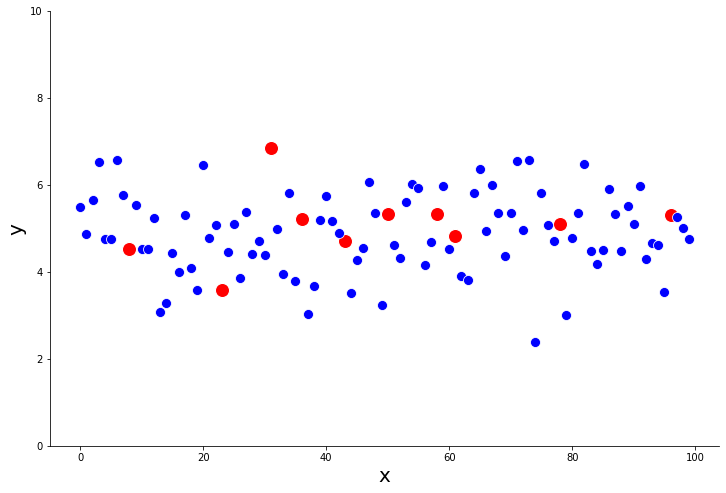

In [58]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y[missing], s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
_ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

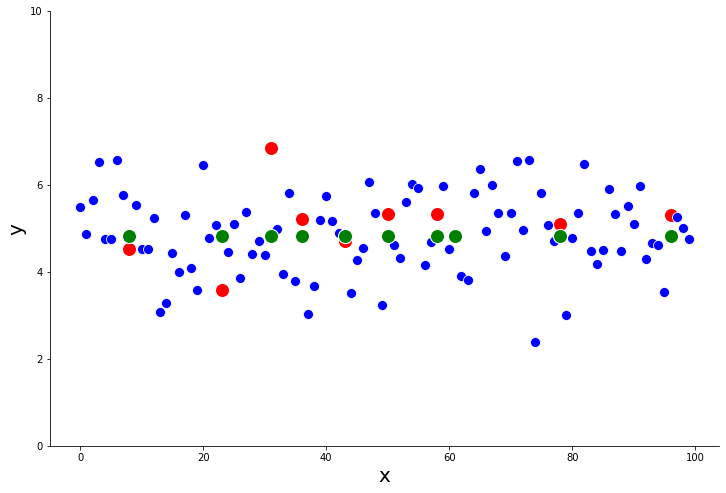

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y[missing], s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
imputed = np.median(y[non_missing]) * np.ones(len(missing))
sns.scatterplot(ax=ax, x=x[missing], y=imputed, s=200, color='g')
_ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

In [51]:
mean, std = 5, 1
n_samples = 100
np.random.seed(42)

y = np.linspace(10,90, 100) + np.random.normal(loc=0, scale=1, size=n_samples)


# indices
x = np.arange(n_samples)
missing = np.random.randint(0, 100, size=n_samples//10)
non_missing = [ix for ix in x if ix not in missing]

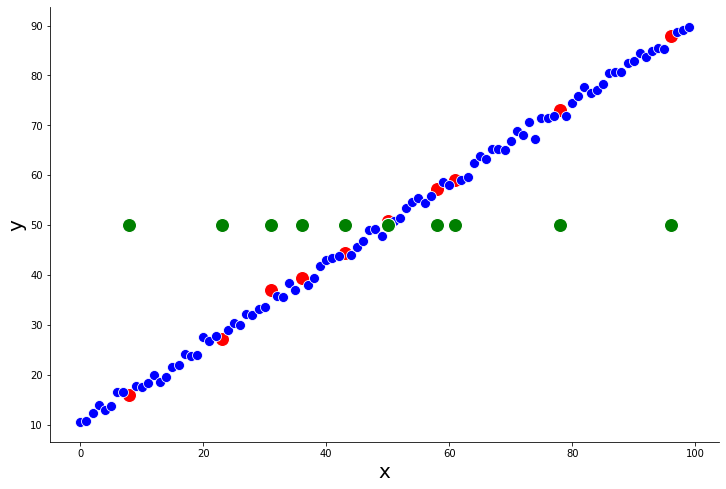

In [53]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y[missing], s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
imputed = np.median(y[non_missing]) * np.ones(len(missing))
sns.scatterplot(ax=ax, x=x[missing], y=imputed, s=200, color='g')
# _ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

In [104]:
mean, std = 5, 1
n_samples = 100
np.random.seed(42)

y = np.random.normal(loc=5, scale=1, size=n_samples)

# indices
x = np.arange(n_samples)
same = np.random.randint(0, 100, size=n_samples//30)
missing = np.random.randint(0, 100, size=n_samples//10)
y[same] = 2.2
non_missing = [ix for ix in x if ix not in missing]

In [105]:
imputed = (
    mode(
        np.concatenate([
            y[non_missing],
            y[same]
        ])
    ) * np.ones(len(missing))
)[0]

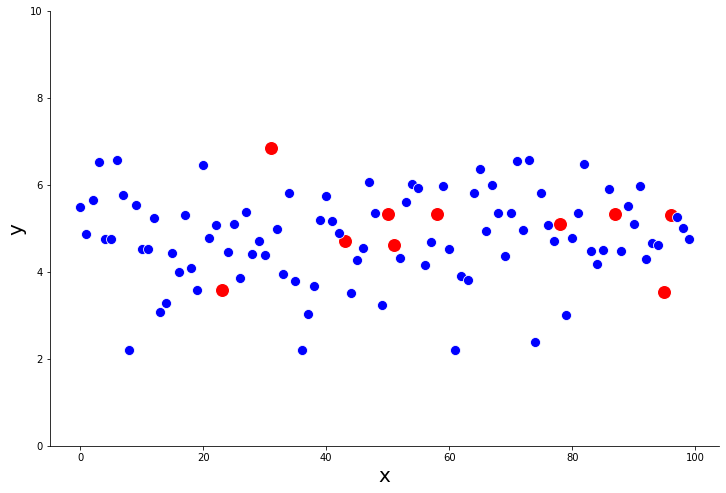

In [108]:
from scipy.stats import mode

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y[missing], s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
sns.scatterplot(ax=ax, x=x[same], y=y[same], s=100, color='b')
# sns.scatterplot(ax=ax, x=x[missing], y=imputed, s=200, color='g')
_ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

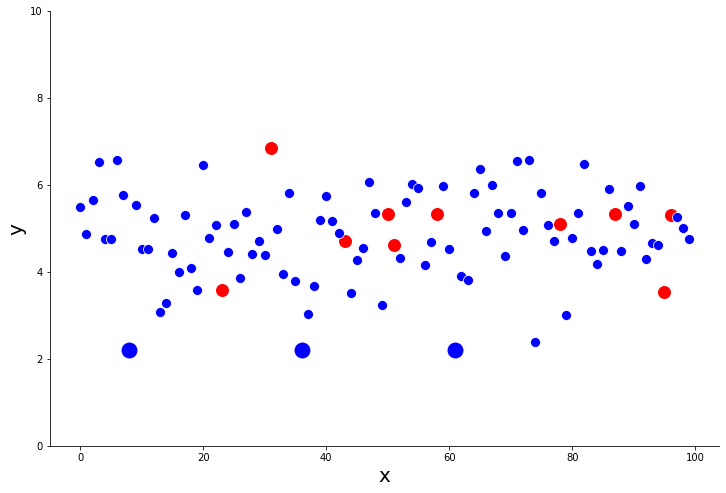

In [109]:
from scipy.stats import mode

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y[missing], s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
sns.scatterplot(ax=ax, x=x[same], y=y[same], s=300, color='b')
# sns.scatterplot(ax=ax, x=x[missing], y=imputed, s=200, color='g')
_ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

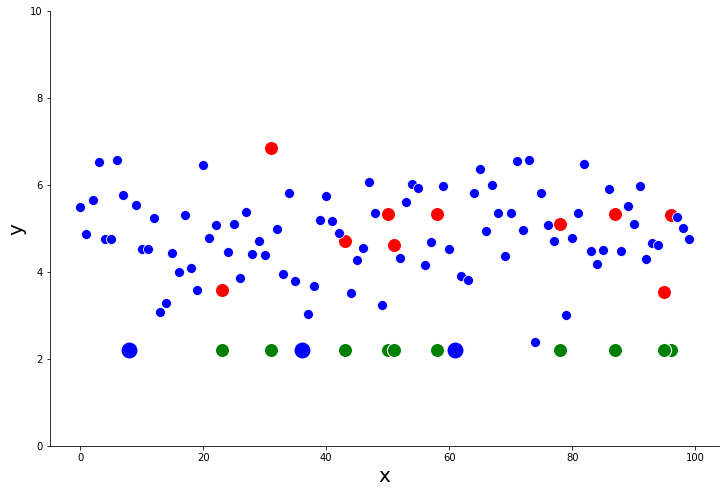

In [110]:
from scipy.stats import mode

fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y[missing], s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
sns.scatterplot(ax=ax, x=x[same], y=y[same], s=300, color='b')
sns.scatterplot(ax=ax, x=x[missing], y=imputed, s=200, color='g')
_ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

In [115]:
mean, std = 5, 1
n_samples = 100
np.random.seed(42)

y = np.linspace(10,90, 100) + np.random.normal(loc=0, scale=1, size=n_samples)


# indices
x = np.arange(n_samples)
missing = np.random.randint(0, 100, size=n_samples//10)
y_missing = y[missing]
y[missing] = np.nan
non_missing = [ix for ix in x if ix not in missing]

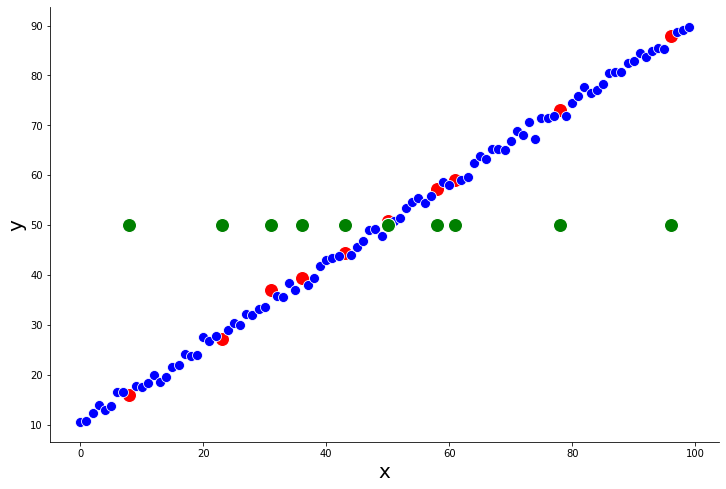

In [116]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y_missing, s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
imputed = np.median(y[non_missing]) * np.ones(len(missing))
sns.scatterplot(ax=ax, x=x[missing], y=imputed, s=200, color='g')
# _ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

In [119]:
y

array([10.49671415, 10.66981651, 12.26385015, 13.94727228, 12.99816986,
       13.80626708, 16.42769766, 16.42400039,         nan, 17.81528732,
       17.61739039, 18.42315914, 19.93893197, 18.59177026, 19.58821348,
       21.55892459, 21.91646181, 24.05162107, 23.63743047, 23.94123165,
       27.62726493, 26.74392067, 27.84530598,         nan, 28.84955667,
       30.31294279, 29.85910743, 32.19387984, 32.02562394, 33.14264968,
       33.64071763,         nan, 35.84508863, 35.60895574, 38.29729239,
       37.06198463,         nan, 37.93931978, 39.37888466, 41.71201275,
       43.0616989 , 43.30268141, 43.82374566,         nan, 44.07703357,
       45.64379216, 46.7110784 , 49.03692021, 49.13149708, 47.83291944,
               nan, 50.82703893, 51.34328002, 53.43995912, 54.66736316,
       55.37572456, 54.41330773, 55.75139368,         nan, 58.6523128 ,
       58.00567425,         nan, 58.99467513, 59.71288429, 62.52969754,
       63.88149255, 63.26132321, 65.14494704, 65.31113097, 65.11

In [130]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='median')
imputer = SimpleImputer(strategy='most_frequent')

imputer = imputer.fit(x.reshape(-1,1))
new_y = imputer.transform(y.reshape(-1,1))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y_missing, s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
imputed = np.median(y[non_missing]) * np.ones(len(missing))
sns.scatterplot(ax=ax, x=x[missing], y=imputed, s=200, color='g')
# _ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

In [129]:
new_y.flatten()

array([10.49671415, 10.66981651, 12.26385015, 13.94727228, 12.99816986,
       13.80626708, 16.42769766, 16.42400039, 49.5       , 17.81528732,
       17.61739039, 18.42315914, 19.93893197, 18.59177026, 19.58821348,
       21.55892459, 21.91646181, 24.05162107, 23.63743047, 23.94123165,
       27.62726493, 26.74392067, 27.84530598, 49.5       , 28.84955667,
       30.31294279, 29.85910743, 32.19387984, 32.02562394, 33.14264968,
       33.64071763, 49.5       , 35.84508863, 35.60895574, 38.29729239,
       37.06198463, 49.5       , 37.93931978, 39.37888466, 41.71201275,
       43.0616989 , 43.30268141, 43.82374566, 49.5       , 44.07703357,
       45.64379216, 46.7110784 , 49.03692021, 49.13149708, 47.83291944,
       49.5       , 50.82703893, 51.34328002, 53.43995912, 54.66736316,
       55.37572456, 54.41330773, 55.75139368, 49.5       , 58.6523128 ,
       58.00567425, 49.5       , 58.99467513, 59.71288429, 62.52969754,
       63.88149255, 63.26132321, 65.14494704, 65.31113097, 65.11

In [132]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=0)
imputer = imputer.fit(x.reshape(-1,1))
new_y = imputer.transform(y.reshape(-1,1))


In [136]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data = pd.DataFrame({'x':x, 'y':y})

imputer = IterativeImputer(random_state=42)
imputer = imputer.fit(data)
new_y = imputer.transform(data)

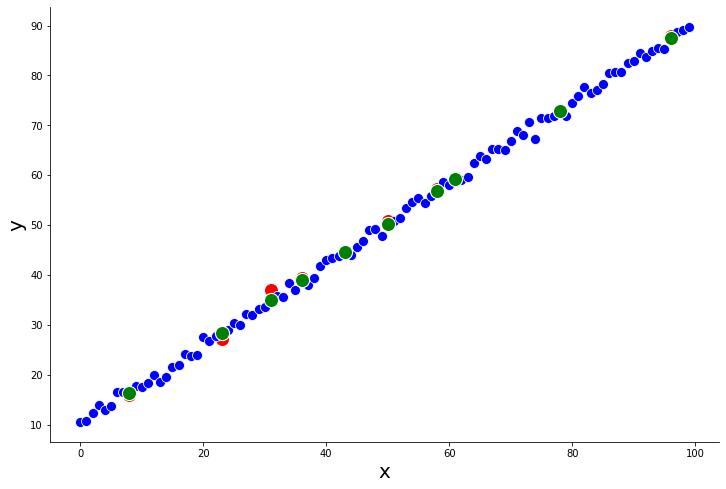

In [143]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.scatterplot(ax=ax, x=x[missing], y=y_missing, s=200, color='r')
sns.scatterplot(ax=ax, x=x[non_missing], y=y[non_missing], s=100, color='b')
sns.scatterplot(ax=ax, x=x[missing], y=new_y[:,1][missing], s=200, color='g')
# _ = ax.set_ylim([0, 10])
_, _ = ax.set_xlabel('x', fontsize=20), ax.set_ylabel('y', fontsize=20)
sns.despine()

In [142]:
new_y[:,1]

array([10.49671415, 10.66981651, 12.26385015, 13.94727228, 12.99816986,
       13.80626708, 16.42769766, 16.42400039, 16.29964597, 17.81528732,
       17.61739039, 18.42315914, 19.93893197, 18.59177026, 19.58821348,
       21.55892459, 21.91646181, 24.05162107, 23.63743047, 23.94123165,
       27.62726493, 26.74392067, 27.84530598, 28.43584211, 28.84955667,
       30.31294279, 29.85910743, 32.19387984, 32.02562394, 33.14264968,
       33.64071763, 34.90848004, 35.84508863, 35.60895574, 38.29729239,
       37.06198463, 38.95387876, 37.93931978, 39.37888466, 41.71201275,
       43.0616989 , 43.30268141, 43.82374566, 44.61743695, 44.07703357,
       45.64379216, 46.7110784 , 49.03692021, 49.13149708, 47.83291944,
       50.28099515, 50.82703893, 51.34328002, 53.43995912, 54.66736316,
       55.37572456, 54.41330773, 55.75139368, 56.75363309, 58.6523128 ,
       58.00567425, 59.18087231, 58.99467513, 59.71288429, 62.52969754,
       63.88149255, 63.26132321, 65.14494704, 65.31113097, 65.11